1. Create a `data` folder in your local project repository.  

2. Download these two CSV files and place them in the data folder:

    a.	Gross Domestic Product (GDP) per capita http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD **DO NOT APPLY ANY FILTERS**
     - rename the file to `gdp_percapita.csv`
     - open it with a text editor (**not excel**) and take a look

    b.	Percentage of Individuals using the Internet http://data.un.org/Data.aspx?d=ITU&f=ind1Code%3aI99H  **DO NOT APPLY ANY FILTERS**
     - rename the file to `internet_use.csv`
     - open it with a text editor (**not excel**) and take a look

2.	Launch a Jupyter Notebook. 
 - _*IMPORTANT:  You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.*_
  - Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from `Code` to `Markdown`.

3.	Import the required packages with their customary aliases as follows:

    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

4.	Use the `%matplotlib inline` magic command so that your plots show in the notebook _without_ having to call `plt.show()` every time.

In [2]:
%matplotlib inline

5.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first 6 rows.

In [3]:
gdp_df = pd.read_csv('/Users/k.simmons/Desktop/NSS/data analytics bootcamp/Python/Projects/gdp-and-internet-usage-latestnight/data/gdp_percapita.csv', nrows = 6868)

In [4]:
gdp_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


6. Repeat for the internet use dataset. Call this DataFrame `internet_df`. Take a look at the first six rows.

In [5]:
internet_df = pd.read_csv('/Users/k.simmons/Desktop/NSS/data analytics bootcamp/Python/Projects/gdp-and-internet-usage-latestnight/data/internet_use.csv', nrows = 4495)

In [6]:
internet_df.tail(6)

,Country or Area,Year,Value,Value Footnotes
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


98. Look at the shape of each DataFrame - how many rows? How many columns?

In [7]:
gdp_df.shape

(6868, 4)

6868 rows, 4 columns for the GDP dataframe

In [8]:
internet_df.shape

(4495, 4)

4495 rows, 4 columns (including the footnotes) for teh internet df

6.	Take a look at the datatypes for the columns in each DataFrame.

In [9]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  6868 non-null   object 
 1   Year             6868 non-null   int64  
 2   Value            6868 non-null   float64
 3   Value Footnotes  1 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 214.8+ KB


In [10]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


99. Take a look at the last 10 rows of each DataFrame in turn.

In [11]:
gdp_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
6858,Zimbabwe,1999,3600.849291,NaN
6859,Zimbabwe,1998,3653.920016,NaN
6860,Zimbabwe,1997,3580.048793,NaN
6861,Zimbabwe,1996,3520.430146,NaN
6862,Zimbabwe,1995,3226.413930,NaN
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN
6867,Zimbabwe,1990,3324.348171,NaN


In [12]:
internet_df.tail(10)

,Country or Area,Year,Value,Value Footnotes
4485,Zimbabwe,2002,3.994356,NaN
4486,Zimbabwe,2001,0.799846,NaN
4487,Zimbabwe,2000,0.401434,NaN
4488,Zimbabwe,1999,0.161676,NaN
4489,Zimbabwe,1998,0.081648,NaN
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


7.	Drop the `value footnotes` column from both DataFrames. Check that this worked as expected.


In [13]:
gdp_df.head(2)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN


In [14]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])

In [15]:
gdp_df.head(20)

,Country or Area,Year,Value
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
5,Afghanistan,2014,2102.385234
6,Afghanistan,2013,2116.465454
7,Afghanistan,2012,2075.491747
8,Afghanistan,2011,1904.559799
9,Afghanistan,2010,1957.029338


In [16]:
internet_df = internet_df.drop(columns = 'Value Footnotes')

In [17]:
internet_df.head(20)

,Country or Area,Year,Value
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
5,Afghanistan,2009,3.550000
6,Afghanistan,2008,1.840000
7,Afghanistan,2007,1.900000
8,Afghanistan,2006,2.107124
9,Afghanistan,2005,1.224148


8.	Change the columns for the GDP Per Capita DataFrame to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.

In [18]:
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Year': 'Year', 'Value': 'GDP_Per_Capita'})
gdp_df.columns

Index(['Country', 'Year', 'GDP_Per_Capita'], dtype='object')

9.	Change the columns for the Internet Users DataFrame to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [19]:
internet_df = internet_df.rename(columns= {'Country or Area':'Country', 'Value':'Internet_Users_Pct'})
internet_df.columns

Index(['Country', 'Year', 'Internet_Users_Pct'], dtype='object')

10.	Merge the two DataFrames to one. Merge **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`.

 Commented parts testing converting Year columns to datetime format to allow for merge, creates whacky dates

In [20]:
#gdp_df.info()
#gdp_df.head(2)
#gdp_df['Year'] = pd.to_datetime(gdp_df['Year'])

In [21]:
#internet_df.info()
#internet_df.head(2)
#internet_df['Year'] = pd.to_datetime(internet_df['Year'])

In [22]:
gdp_and_internet_use = gdp_df.merge(internet_df, how='outer')

In [23]:
gdp_and_internet_use.sort_values('Country')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
6869,Afghanistan,1990,NaN,0.000000
17,Afghanistan,2002,1189.784878,0.004561
16,Afghanistan,2003,1235.810063,0.087891
15,Afghanistan,2004,1200.278256,0.105809
...,...,...,...,...
6839,Zimbabwe,2018,3130.029501,NaN
6838,Zimbabwe,2019,2835.948532,NaN
6867,Zimbabwe,1990,3324.348171,0.000000
6851,Zimbabwe,2006,2233.017549,9.791842


In [24]:
gdp_and_internet_use.head(20)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
5,Afghanistan,2014,2102.385234,6.390000
6,Afghanistan,2013,2116.465454,5.900000
7,Afghanistan,2012,2075.491747,5.454545
8,Afghanistan,2011,1904.559799,5.000000
9,Afghanistan,2010,1957.029338,4.000000


In [25]:
gdp_and_internet_use.shape

(7905, 4)

11.	Look at the first five rows of your new DataFrame to confirm it merged correctly.

In [26]:
gdp_and_internet_use.head(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN


12.	Look at the last five rows to make sure the data is clean and as expected.

In [27]:
gdp_and_internet_use.tail(5)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7900,Yemen,1999,NaN,0.056629
7901,Yemen,1998,NaN,0.023323
7902,Yemen,1997,NaN,0.015025
7903,Yemen,1996,NaN,0.000621
7904,Yemen,1990,NaN,0.000000


13.	Subset the combined DataFrame to keep only the data for 2004, 2009, and 2014. Check that this happened correctly.

In [28]:
masked_years = gdp_and_internet_use['Year'].isin([2004, 2009, 2014])

In [29]:
gdp_and_internet_use[masked_years]

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.390000
10,Afghanistan,2009,1758.904043,3.550000
15,Afghanistan,2004,1200.278256,0.105809
23,Albania,2014,11623.866679,60.100000
28,Albania,2009,10346.864199,41.200000
...,...,...,...,...
7868,Virgin Islands (U.S.),2009,NaN,27.396510
7873,Virgin Islands (U.S.),2004,NaN,27.377009
7885,Yemen,2014,NaN,22.550000
7890,Yemen,2009,NaN,9.960000


14.	Create three new DataFrames, one for 2004, one for 2009, and one for 2014. Give them meaningful names that aren't too long.

In [30]:
gdpinternet2004 = gdp_and_internet_use['Year'] == 2004
gdpinternet2009 = gdp_and_internet_use['Year'] == 2009
gdpinternet2014 = gdp_and_internet_use['Year'] == 2014

In [31]:
gdpinternet2004 = gdp_and_internet_use[gdpinternet2004]
gdpinternet2009 = gdp_and_internet_use[gdpinternet2009]
gdpinternet2014 = gdp_and_internet_use[gdpinternet2014]

In [32]:
gdpinternet2004

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
15,Afghanistan,2004,1200.278256,0.105809
33,Albania,2004,7604.838002,2.420388
63,Algeria,2004,10058.435939,4.634475
93,Angola,2004,5593.241537,0.464815
123,Antigua and Barbuda,2004,18745.681534,24.266544
...,...,...,...,...
7771,T.F.Y.R. Macedonia,2004,NaN,24.440000
7829,Venezuela,2004,NaN,8.404470
7853,Viet Nam,2004,NaN,7.642409
7873,Virgin Islands (U.S.),2004,NaN,27.377009


In [33]:
gdpinternet2009

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
10,Afghanistan,2009,1758.904043,3.55000
28,Albania,2009,10346.864199,41.20000
58,Algeria,2009,10782.361398,11.23000
88,Angola,2009,7643.493749,6.00000
118,Antigua and Barbuda,2009,20046.839017,42.00000
...,...,...,...,...
7766,T.F.Y.R. Macedonia,2009,NaN,51.77000
7824,Venezuela,2009,NaN,32.70000
7848,Viet Nam,2009,NaN,26.55000
7868,Virgin Islands (U.S.),2009,NaN,27.39651


In [34]:
gdpinternet2014

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5,Afghanistan,2014,2102.385234,6.39
23,Albania,2014,11623.866679,60.10
53,Algeria,2014,11512.705405,18.09
83,Angola,2014,8239.828837,21.26
113,Antigua and Barbuda,2014,18104.241470,64.00
...,...,...,...,...
7761,T.F.Y.R. Macedonia,2014,NaN,68.06
7819,Venezuela,2014,NaN,57.00
7843,Viet Nam,2014,NaN,48.31
7863,Virgin Islands (U.S.),2014,NaN,50.07


15.	Which country had the highest percentage of internet users in 2014? What was the percentage? (Try typing the first 3 letters of your DataFrame name and hitting the tab key for auto-complete options).

In [35]:
gdpinternet2014.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


Iceland had the highest percentage of internet users in 2014 at 98.16% 

16.	Which country had the lowest percentage of internet users in 2014? What was the percentage?

In [36]:
gdpinternet2014.sort_values(by='Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7079,Dem. People's Rep. of Korea,2014,NaN,0.00
7137,Eritrea,2014,NaN,0.99
6219,Timor-Leste,2014,3264.568070,1.14
827,Burundi,2014,886.235777,1.38
7674,Somalia,2014,NaN,1.63
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN


North Korea had the lowest percentage of internet users in 2014, at 0%

17.	Repeat for 2004 and 2009.

In [37]:
gdpinternet2004.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6019,Sweden,2004,44496.023401,83.89
2635,Iceland,2004,45145.545658,83.88
1462,Denmark,2004,50607.628971,80.93
4658,Norway,2004,60893.410993,77.69
7400,Korea (Rep. of),2004,NaN,72.70
...,...,...,...,...
6437,Tuvalu,2004,3336.952920,NaN
6617,Upper middle income,2004,8567.061394,NaN
6737,Vietnam,2004,3689.732423,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN


In [38]:
gdpinternet2004.sort_values(by='Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7088,Dem. People's Rep. of Korea,2004,NaN,0.000000
4342,Myanmar,2004,1696.881760,0.024337
3545,Liberia,2004,1181.546158,0.031011
6079,Tajikistan,2004,1737.743630,0.077480
15,Afghanistan,2004,1200.278256,0.105809
...,...,...,...,...
6437,Tuvalu,2004,3336.952920,NaN
6617,Upper middle income,2004,8567.061394,NaN
6737,Vietnam,2004,3689.732423,NaN
6767,West Bank and Gaza,2004,4485.525458,NaN


In 2004, Sweden had the highest percentage of internet users at 83.89%, and North Korea had the lowest at 0%

In [39]:
gdpinternet2009.sort_values(by='Internet_Users_Pct', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2630,Iceland,2009,48177.084123,93.00
4653,Norway,2009,61886.564498,92.08
6014,Sweden,2009,45638.035577,91.00
4443,Netherlands,2009,51772.424928,89.63
3696,Luxembourg,2009,104932.811953,87.31
...,...,...,...,...
6194,The Gambia,2009,2283.183556,NaN
6612,Upper middle income,2009,11212.934078,NaN
6732,Vietnam,2009,4830.304958,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN


In [40]:
gdpinternet2009.sort_values(by='Internet_Users_Pct')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7083,Dem. People's Rep. of Korea,2009,NaN,0.000000
6224,Timor-Leste,2009,2724.770973,0.185252
4337,Myanmar,2009,2874.780227,0.220000
5439,Sierra Leone,2009,1372.392285,0.260000
922,Cambodia,2009,2603.583778,0.530000
...,...,...,...,...
6194,The Gambia,2009,2283.183556,NaN
6612,Upper middle income,2009,11212.934078,NaN
6732,Vietnam,2009,4830.304958,NaN
6762,West Bank and Gaza,2009,5250.116075,NaN


In 2009, Iceland had the highest number of internet users, at 93%, and North Korea had the lowest at 0%

18.	Which country had the highest gdp per capita in 2014? What was the gdp per capita?

In [41]:
gdpinternet2014.sort_values(by='GDP_Per_Capita', ascending=False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3721,"Macao SAR, China",2014,156514.133850,NaN
3691,Luxembourg,2014,108760.916030,94.67
5138,Qatar,2014,95578.416973,91.49
5464,Singapore,2014,87808.663157,82.00
561,Bermuda,2014,77361.104881,96.80
...,...,...,...,...
7761,T.F.Y.R. Macedonia,2014,NaN,68.06
7819,Venezuela,2014,NaN,57.00
7843,Viet Nam,2014,NaN,48.31
7863,Virgin Islands (U.S.),2014,NaN,50.07


In 2014, Macau had the highest GDP per capita at 156514.13.

20.	Which country had the lowest gdp per capita in 2014? What was the gdp per capita?

In [42]:
gdpinternet2014.sort_values(by='GDP_Per_Capita')

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
1047,Central African Republic,2014,822.610458,NaN
827,Burundi,2014,886.235777,1.38
3781,Malawi,2014,1027.208496,5.83
1422,Dem. Rep. Congo,2014,1029.790785,NaN
4528,Niger,2014,1127.615541,1.95
...,...,...,...,...
7761,T.F.Y.R. Macedonia,2014,NaN,68.06
7819,Venezuela,2014,NaN,57.00
7843,Viet Nam,2014,NaN,48.31
7863,Virgin Islands (U.S.),2014,NaN,50.07


In 2014, Central African Republic had the lowest GDP per capita at 822.61

21.	Create some scatterplots:  
    a.  2004 Percent Using the Internet vs GDP Per Capita  
    b.	2009 Percent Using the Internet vs GDP Per Capita  
    c.	2014 Percent Using the Internet vs GDP Per Capita

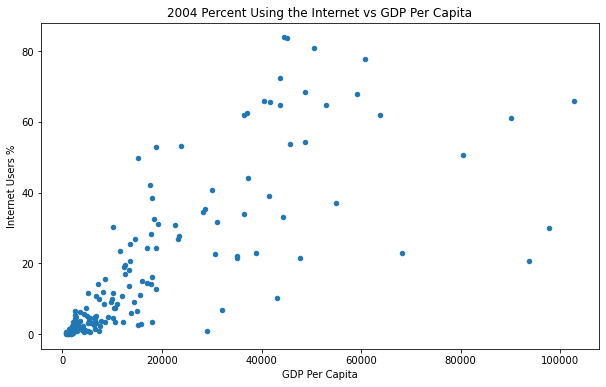

In [55]:
gdpinternet2004.plot(kind = 'scatter',
             x = 'GDP_Per_Capita',
             xlabel = 'GDP Per Capita',
             y = 'Internet_Users_Pct',
             ylabel = 'Internet Users %',
             title = '2004 Percent Using the Internet vs GDP Per Capita',
             figsize = (10,6));

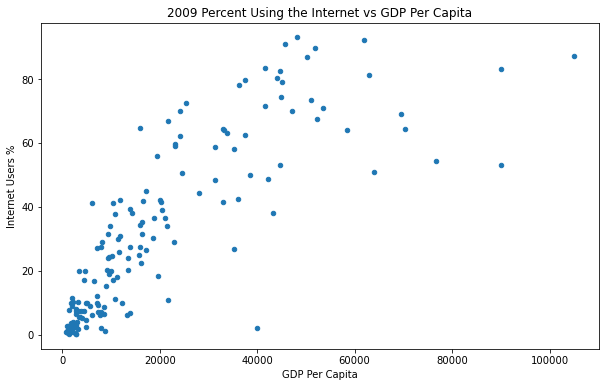

In [56]:
gdpinternet2009.plot(kind = 'scatter',
             x = 'GDP_Per_Capita',
             xlabel = 'GDP Per Capita',
             y = 'Internet_Users_Pct',
             ylabel = 'Internet Users %',
             title = '2009 Percent Using the Internet vs GDP Per Capita',
             figsize = (10,6));

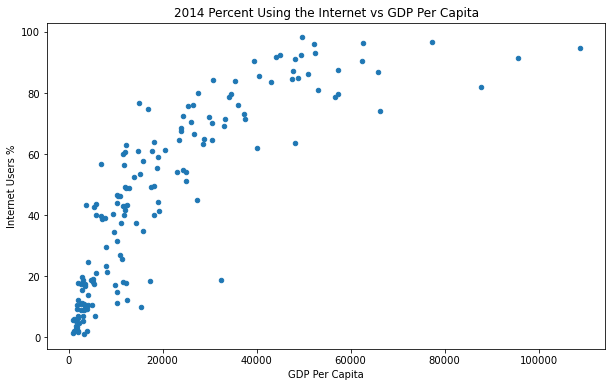

In [57]:
gdpinternet2014.plot(kind = 'scatter',
             x = 'GDP_Per_Capita',
             xlabel = 'GDP Per Capita',
             y = 'Internet_Users_Pct',
             ylabel = 'Internet Users %',
             title = '2014 Percent Using the Internet vs GDP Per Capita',
             figsize = (10,6));

22.	Are there differences across years? What do the plots tell you about any relationship between these two variables? Enter your observations as a markdown cell.

The three scatterplots appear to show that as time progressed, the percentage of population using the internet increased amongst countries with a lower GDP per capita.

23.	Look at the distribution of gdp per capita values for 2014. Is it unimodal?

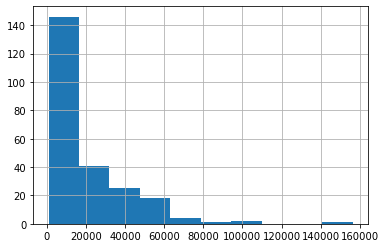

In [62]:
gdpinternet2014['GDP_Per_Capita'].hist();

The GDP per capita distribution for 2014 is unimodal

24.	Look at the distribution of Internet Use for 2014. Is it unimodal?

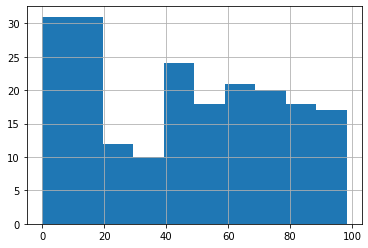

In [63]:
gdpinternet2014['Internet_Users_Pct'].hist();

The distribution for percentage of internet usage in 2014 is not unimodal. It appears to be bimodal.

25.	What are the top 5 countries in terms of internet use in 2014?

In [67]:
gdpinternet2014.sort_values(by = 'Internet_Users_Pct', ascending = False)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2625,Iceland,2014,49652.149500,98.16
561,Bermuda,2014,77361.104881,96.80
4648,Norway,2014,62589.373548,96.30
1452,Denmark,2014,52214.537753,95.99
6871,Andorra,2014,NaN,95.90
...,...,...,...,...
6427,Tuvalu,2014,3450.793169,NaN
6607,Upper middle income,2014,14275.343977,NaN
6727,Vietnam,2014,6098.489609,NaN
6757,West Bank and Gaza,2014,5967.073437,NaN
